In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
    
<tbody>
    
<tr>
<td>Offence Code</td>
<td>Categorical</td>
<td>number code for each offence type</td>
</tr>

<tr>
<td>Offence Code Group</td>
<td>Categorical</td>
<td>group name underwhich each offence type falls</td>
</tr>

<tr>
<td>REPORTING_AREA</td>
<td>Categorical</td>
<td>number code for each police area</td>
</tr>

<tr>
<td>SHOOTING</td>
<td>Categorical</td>
<td>binary data indicates whether there was a shooting </td>
</tr>

<tr>
<td>YEAR</td>
<td>Continuous</td>
<td>year of incident</td>
</tr>

<tr>
<td>Month</td>
<td>Continuous</td>
<td>Month of incident</td>
</tr>

<tr>
<td>Day</td>
<td>Continuous</td>
<td>Day of incident</td>
</tr>

<tr>
<td>Hour</td>
<td>Continuous</td>
<td>Hour of incident</td>
</tr>

<tr>
<td>Day of Week </td>
<td>Categorical</td>
<td>day of week of incident</td>
</tr>


<tr>
<td>UCR PART</td>
<td>Categorical</td>
<td>UCR classification of incident (will be used as out label)</td>
</tr>

<tr>
<td>Offence Code Group</td>
<td>Categorical</td>
<td>group name underwhich each offence type falls</td>
</tr>

<tr>
<td>Street</td>
<td>Categorical</td>
<td>Street where the crime occured</td>
</tr>



<tr>
<td>Lattitude</td>
<td>Continuous</td>
<td>Lattitude where the crime occured</td>
</tr>

<tr>
<td>Longitude</td>
<td>Continuous</td>
<td>Longitude where the crime occured</td>
</tr>

</tbody>

</table>

### The Data 


** read in the crime data with pandas **

In [3]:
crime = pd.read_csv("cleanBoston.csv")

In [4]:
crime.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,DAY
0,111,Homicide,E18,0,N,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,9
1,637,Larceny,B2,1,N,2018,12,Thursday,0,Part One,BROOKLEDGE ST,42.309563,-71.089902,13
2,403,Aggravated Assault,B3,2,N,2015,11,Friday,11,Part One,BLUE HILL AVE,42.301897,-71.085549,20
3,339,Robbery,A1,3,N,2015,7,Monday,10,Part One,BOWDOIN SQ,42.361645,-71.062299,27
4,629,Larceny,D4,4,N,2016,6,Sunday,17,Part One,COVENTRY ST,42.336951,-71.085748,5


In [5]:
crime['OFFENSE_CODE'] = crime['OFFENSE_CODE'].apply(np.int64)

In [6]:
crime['UCR_PART'].count()

197280

our label is the 'UCR_PART' column. we need to convert it from strings to = Part1 : 0, Part2: 1, Blank: 2

In [7]:
crime['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Blank'], dtype=object)

In [8]:
def label_fix(label):
    if label=='Part One':
        return 0
    elif label == 'Part Two':
        return 1
    else:
        return 2

In [9]:
crime['UCR_PART'] = crime['UCR_PART'].apply(label_fix)

### Perform a train test split on the data 

In [10]:
x_data = crime.drop('UCR_PART',axis=1)
y_labels = crime['UCR_PART']
# train test split is 70% 30%
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

In [11]:
# y_test.unique()


### Create the Feature Columns for tf.esitmator

In [22]:
crime.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA',
       'SHOOTING', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'DAY'],
      dtype='object')

categorical columns = ['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'DAY_OF_WEEK', 'STREET']
continueus columns = ['YEAR', 'MONTH', 'HOUR', 'DAY', 'Lat', 'Long'] <br>
label = ['UCR_PART']

In [23]:
# number of unique values in each categorical group
crime['OFFENSE_CODE'].nunique()
crime['OFFENSE_CODE_GROUP'].nunique()
crime['DISTRICT'].nunique()
crime['REPORTING_AREA'].nunique()
crime['SHOOTING'].nunique()
crime['DAY_OF_WEEK'].nunique()
crime['STREET'].nunique()

3614

Feature columns of categorical values

In [24]:
offenceCode = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE', hash_bucket_size=200)
offenceCodeGroup = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE_GROUP', hash_bucket_size=100)
district = tf.feature_column.categorical_column_with_hash_bucket('DISTRICT', hash_bucket_size=15)
area = tf.feature_column.categorical_column_with_hash_bucket('REPORTING_AREA', hash_bucket_size=1000)
shooting = tf.feature_column.categorical_column_with_vocabulary_list('SHOOTING', ['Y', 'N'])
dayOfWeek = tf.feature_column.categorical_column_with_hash_bucket('DAY_OF_WEEK', hash_bucket_size=10)
street = tf.feature_column.categorical_column_with_hash_bucket('STREET', hash_bucket_size=4000)

Feature columns of continuous values 

In [25]:
year = tf.feature_column.numeric_column('YEAR')
month = tf.feature_column.numeric_column('MONTH')
hour = tf.feature_column.numeric_column('HOUR')
day = tf.feature_column.numeric_column('DAY')
lat = tf.feature_column.numeric_column('Lat')
long = tf.feature_column.numeric_column('Long')

create a list of feature columns

In [26]:
#offenceCode, , area
feat_cols = [ offenceCodeGroup, district, shooting, dayOfWeek, street, year, month, hour, day, lat, long]

In [27]:
#create input function 
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

In [28]:
# create a model with tf estimator
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ahmed\\AppData\\Local\\Temp\\tmpvs6ezdcf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024E2CDA8BC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
model.train(input_fn=input_func,steps=5000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ahmed\AppData\Local\Temp\tmpvs6ezdcf\model.ckpt.
INFO:tensorflow:loss = 109.86121, step = 1
INFO:tensorflow:global_step/sec: 85.6175
INFO:tensorflow:loss = 1299.5792, step = 101 (1.184 sec)
INFO:tensorflow:global_step/sec: 199.918
INFO:tensorflow:loss = 2997.7598, step = 201 (0.484 sec)
INF

## Evaluation 
** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **


In [30]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [31]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-01T22:52:12Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\ahmed\AppData\Local\Temp\tmpvs6ezdcf\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-01-22:52:33
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.99922276, average_loss = 0.0048986315, global_step = 5000, loss = 0.048981346
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\ahmed\AppData\Local\Temp\tmpvs6ezdcf\model.ckpt-5000


In [32]:
results

{'accuracy': 0.99922276,
 'average_loss': 0.0048986315,
 'loss': 0.048981346,
 'global_step': 5000}

## DNN Model 

In [12]:
# dnn_model.train(input_fn=input_func,steps=1000)

In [13]:
# offenceCode = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE', hash_bucket_size=200)
# offenceCodeGroup = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE_GROUP', hash_bucket_size=100)
# district = tf.feature_column.categorical_column_with_hash_bucket('DISTRICT', hash_bucket_size=15)
# area = tf.feature_column.categorical_column_with_hash_bucket('REPORTING_AREA', hash_bucket_size=1000)
# shooting = tf.feature_column.categorical_column_with_vocabulary_list('SHOOTING', ['Y', 'N'])
# dayOfWeek = tf.feature_column.categorical_column_with_hash_bucket('DAY_OF_WEEK', hash_bucket_size=10)
# street = tf.feature_column.categorical_column_with_hash_bucket('STREET', hash_bucket_size=4000)

In [14]:
# number of unique values in each categorical group
# crime['OFFENSE_CODE'].nunique()
# crime['OFFENSE_CODE_GROUP'].nunique()
# crime['DISTRICT'].nunique()
# crime['REPORTING_AREA'].nunique()
# crime['SHOOTING'].nunique()
# crime['DAY_OF_WEEK'].nunique()
# crime['STREET'].nunique()

Feature columns of categorical values 

In [15]:
offenceCode = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE', hash_bucket_size=200)
offenceCodeGroup = tf.feature_column.categorical_column_with_hash_bucket('OFFENSE_CODE_GROUP', hash_bucket_size=100)
district = tf.feature_column.categorical_column_with_hash_bucket('DISTRICT', hash_bucket_size=15)
area = tf.feature_column.categorical_column_with_hash_bucket('REPORTING_AREA', hash_bucket_size=1000)
shooting = tf.feature_column.categorical_column_with_vocabulary_list('SHOOTING', ['Y', 'N'])
dayOfWeek = tf.feature_column.categorical_column_with_vocabulary_list('DAY_OF_WEEK', ['Sunday', 'Monday', 'Tuesday',
                                                                                     'Wednesday', 'Thursday', 'Friday', 'Saturday'])
street = tf.feature_column.categorical_column_with_hash_bucket('STREET', hash_bucket_size=4000)

feature columns of continuous values 

In [16]:
year = tf.feature_column.numeric_column('YEAR')
month = tf.feature_column.numeric_column('MONTH')
hour = tf.feature_column.numeric_column('HOUR')
day = tf.feature_column.numeric_column('DAY')
lat = tf.feature_column.numeric_column('Lat')
long = tf.feature_column.numeric_column('Long')

embeding columns 

In [17]:
offenceCode_emb = tf.feature_column.embedding_column(offenceCode, dimension=155)
offenceCodeGroup_emb = tf.feature_column.embedding_column(offenceCodeGroup, dimension=42)
district_emb = tf.feature_column.embedding_column(district, dimension=12)
area_emb = tf.feature_column.embedding_column(area, dimension=878)
shooting_emb = tf.feature_column.embedding_column(shooting, dimension=2)
dayOfWeek_emb = tf.feature_column.indicator_column(dayOfWeek)
street_emb = tf.feature_column.embedding_column(street, dimension=3614)

In [18]:
# offenceCode_emb, area_emb,
feat_cols2 = [  offenceCodeGroup_emb, district_emb ,  shooting_emb, dayOfWeek_emb , street_emb, year, month, hour, day, lat, long]

In [19]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=20,shuffle=True)

In [20]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[20,15,10],feature_columns=feat_cols2,n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ahmed\\AppData\\Local\\Temp\\tmpa4cf_vqd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000243463CF5C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:

dnn_model.train(input_fn=input_func,steps=1000 )



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructi

## Evaluate 

In [22]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [30]:
results = dnn_model.evaluate(eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-03T21:11:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahmed\AppData\Local\Temp\tmpa4cf_vqd\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-12-03-21:11:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9824, average_loss = 0.058494434, global_step = 1000, loss = 0.5849443
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000

In [31]:
results

{'accuracy': 0.9824,
 'average_loss': 0.058494434,
 'loss': 0.5849443,
 'global_step': 1000}

# Visulalize 

In [25]:
loss_history = [236.29616, 7.612279, 7.7511044, 6.1270046, 
                7.912278, 5.257882, 2.8464282, 5.020406, 0.5457734,
                0.18525206]
steps = [1,101,201,301,401,501,601,701,801,901]

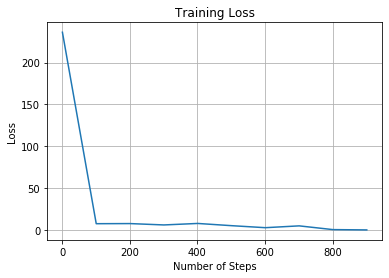

In [36]:
plt.plot(steps, loss_history)
plt.xlabel('Number of Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('trainingLoss.jpg')
plt.grid()
